In [1]:
!pip install tweepy
!pip install vaderSentiment
!pip install python-louvain

^C


In [27]:
# #extract tweets from twitter
# import tweepy 
  
# consumer_key = "" 
# consumer_secret = ""
# access_key = ""
# access_secret = ""

          
# # Authorization to consumer key and consumer secret 
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 

# # Access to user's access key and access secret 
# auth.set_access_token(access_key, access_secret) 

# # Calling api 
# api = tweepy.API(auth) 

# tweets = api.search(q="DelhiVoilence", lang="en", count=80)

# # Empty Array 
# tmp=[]  

# # create array of tweet information: username,  
# # tweet id, date/time, text 
# tweets_for_csv = [tweet.text for tweet in tweets] # CSV file created  
# for j in tweets_for_csv: 
#     # Appending tweets to the empty array tmp 
#     tmp.append(j)  

# # Printing the tweets
# org = tmp
# print(tmp) 

In [26]:
# #get random tweets from bbchealth file
# f = open('C:/Users/sumit/data/bbchealth.txt', "r", encoding="utf8")
# tweets = list(f)
# list_of_tweets = []

# for i in range(len(tweets)):

#     # remove \n from the end after every sentence
#     tweets[i] = tweets[i].strip('\n')

#     # Remove the tweet id and timestamp
#     tweets[i] = tweets[i][50:]

#     # Remove any word that starts with the symbol @
#     tweets[i] = " ".join(filter(lambda x: x[0] != '@', tweets[i].split()))

#     # Remove any URL
#     tweets[i] = re.sub(r"http\S+", "", tweets[i])
#     tweets[i] = re.sub(r"www\S+", "", tweets[i])

#     # remove colons from the end of the sentences (if any) after removing url
#     tweets[i] = tweets[i].strip()
#     tweet_len = len(tweets[i])
#     if tweet_len > 0:
#         if tweets[i][len(tweets[i]) - 1] == ':':
#             tweets[i] = tweets[i][:len(tweets[i]) - 1]

#     # Remove any hash-tags symbols
#     tweets[i] = tweets[i].replace('#', '')

#     # Convert every word to lowercase
#     tweets[i] = tweets[i].lower()

#     # remove punctuations
#     tweets[i] = tweets[i].translate(str.maketrans('', '', string.punctuation))

#     # trim extra spaces
#     tweets[i] = " ".join(tweets[i].split())

#     # convert each tweet from string type to as list<string> using " " as a delimiter
#     list_of_tweets.append(tweets[i].split(' '))
    
# tweets_exp = list_of_tweets[:20]
# tweets_abs = list_of_tweets[:20]

In [1]:
import csv
import re
import string

with open('C:/Users/user/data/#repost.csv', encoding="utf8") as csvfile:
    data = list(csv.reader(csvfile))

list_of_tweets = []
for i in range(1, len(data)):
    
    tweet = data[i][3]

    # remove \n from the end after every sentence
    tweet = tweet.strip('\n')

    # Remove any word that starts with the symbol @
    tweet = " ".join(filter(lambda x: x[0] != '@', tweet.split()))

    # Remove any URL
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub(r"www\S+", "", tweet)

    # remove colons from the end of the sentences (if any) after removing url
    tweet = tweet.strip()
    tweet_len = len(tweet)
    if tweet_len > 0:
        if tweet[len(tweet) - 1] == ':':
            tweet = tweet[:len(tweet) - 1]

    # Remove any hash-tags symbols
    tweet = tweet.replace('#', '')

    # Convert every word to lowercase
    tweet = tweet.lower()

    # remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))

    # trim extra spaces
    tweet = " ".join(tweet.split())

    # convert each tweet from string type to as list<string> using " " as a delimiter
    list_of_tweets.append(tweet.split(' '))
    
tweets_exp = list_of_tweets[:500]
tweets_abs = list_of_tweets[:500]

In [2]:
print('found %d tweets' % len(list_of_tweets))

found 7301 tweets


In [3]:
#getting expression words from pwords and nwords file

f = open('C:/Users/user/data/pwords.txt', "r", encoding="utf8")
pwords = list(f)
    
f = open('C:/Users/user/data/nwords.txt', "r", encoding="utf8")
nwords = list(f)

for i in range(len(pwords)):
    pwords[i] = pwords[i].strip('\n')
for i in range(len(nwords)):
    nwords[i] = nwords[i].strip('\n')

In [4]:
#removing expression words from tweets
for n,text in enumerate(tweets_abs):  
    ntext = []
    for word in text:
        if word not in pwords and word not in nwords:
            ntext.append(word) 
    tweets_abs[n] = ntext
    
    
for n,text in enumerate(tweets_exp):  
    ntext = []
    for word in text:
        if word in pwords or word in nwords:
            ntext.append(word) 
    tweets_exp[n] = ntext
    

#joining the words again into sentences
# seperator = ' '
# for n,text in enumerate(tweets_abs):
#     tweets_abs[n] = seperator.join(text)

tweets_abs = [' '.join(i) for i in tweets_abs]
tweets_exp = [' '.join(i) for i in tweets_exp]

In [5]:
#working on abstraction score(tweets_abs)........................................................................

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_vectorizer = TfidfVectorizer()
sparse_matrix = tfidf_vectorizer.fit_transform(tweets_abs)

doc_term_matrix = sparse_matrix.todense()
df_abs = pd.DataFrame(doc_term_matrix, 
                  columns=tfidf_vectorizer.get_feature_names())
print(doc_term_matrix)
print(cosine_similarity(df_abs))

[[0.         0.         0.         ... 0.35311752 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.35311752 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.27146389 0.         0.        ]
 [0.         0.         0.         ... 0.23514478 0.         0.        ]]
[[1.         0.00491405 0.62283593 ... 0.03510693 0.15394561 0.08893562]
 [0.00491405 1.         0.00491405 ... 0.00380347 0.00377774 0.00327232]
 [0.62283593 0.00491405 1.         ... 0.03510693 0.15394561 0.08893562]
 ...
 [0.03510693 0.00380347 0.03510693 ... 1.         0.02698893 0.00456805]
 [0.15394561 0.00377774 0.15394561 ... 0.02698893 1.         0.19710499]
 [0.08893562 0.00327232 0.08893562 ... 0.00456805 0.19710499 1.        ]]


In [30]:
import matplotlib.pyplot as plt
import networkx as nx

Gabs = nx.Graph()

l = len(tweets_abs)
for i in range(l):
    for j in range(i+1, l):
        if cosine_similarity(df_abs)[i][j] != 0:
            print(i, j)
            Gabs.add_edge(str(i), str(j), weight = cosine_similarity(df_abs)[i][j])

e = [(u, v) for (u, v, d) in Gabs.edges(data=True)]
#esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(Gabs)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(Gabs, pos, node_size=200)

# edges
nx.draw_networkx_edges(Gabs, pos, edgelist=e,
                       width=.3)
# labels
nx.draw_networkx_labels(Gabs, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

In [26]:
vt_abs = Gabs.number_of_nodes()
Gabs.number_of_nodes()

500

In [9]:
#working on expression score(tweets_exp).....................................................................

In [10]:
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
   
# # Create a SentimentIntensityAnalyzer object. 
# sid_obj = SentimentIntensityAnalyzer()
# score = []
# for text in tweets_exp:
#     sentiment_dict = sid_obj.polarity_scores(text)
#     score.append(sentiment_dict['compound'])

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_vectorizer = TfidfVectorizer()
sparse_matrix = tfidf_vectorizer.fit_transform(tweets_exp)

doc_term_matrix = sparse_matrix.todense()
df_exp = pd.DataFrame(doc_term_matrix, 
                  columns=tfidf_vectorizer.get_feature_names())
print(doc_term_matrix)
print(cosine_similarity(df_exp))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


6 93
6 230
6 260
6 478
9 219
9 391
10 116
10 212
10 286
10 355
10 362
10 446
26 32
26 42
26 160
26 247
26 471
30 381
32 42
32 74
32 103
32 160
32 247
32 323
32 471
42 160
42 247
42 471
48 473
48 477
48 479
51 268
51 403
51 404
51 405
51 406
51 407
51 481
56 186
56 315
56 347
56 431
56 480
66 117
66 221
66 228
73 477
73 479
74 103
74 323
93 230
93 260
93 478
95 133
95 145
95 149
95 205
95 339
95 390
95 478
97 160
97 322
97 399
103 323
116 212
116 286
116 355
116 362
117 221
117 228
124 257
124 262
124 321
124 366
133 145
133 149
133 205
133 339
133 390
133 478
145 147
145 149
145 205
145 304
145 339
145 390
145 478
147 149
147 304
149 205
149 304
149 339
149 390
149 478
150 151
156 257
156 329
160 247
160 322
160 399
160 471
186 315
186 347
186 431
186 480
203 391
205 339
205 390
205 478
208 260
211 225
212 286
212 355
212 362
219 391
221 228
225 305
230 260
230 478
235 443
244 386
247 471
253 493
257 262
257 321
257 329
257 366
260 478
262 321
262 366
268 403
268 404
268 405
268 406
26

C:\Users\user\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


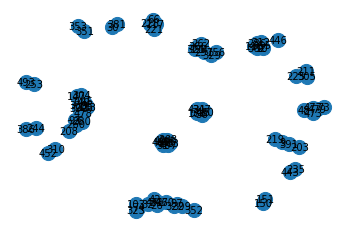

In [35]:
import matplotlib.pyplot as plt
import networkx as nx

Gexp = nx.Graph()

l = len(tweets_exp)
for i in range(l):
    for j in range(i+1, l):
        if cosine_similarity(df_exp)[i][j] != 0:
            print(i, j)
            Gexp.add_edge(str(i), str(j), weight = cosine_similarity(df_exp)[i][j])
#         sc = abs(score[i] - score[j])
#         if  sc != 0:
#             Gexp.add_edge(str(i), str(j), weight = sc)

e = [(u, v) for (u, v, d) in Gexp.edges(data=True)]

pos = nx.spring_layout(Gexp)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(Gexp, pos, node_size=200)

# edges
nx.draw_networkx_edges(Gexp, pos, edgelist=e,
                       width=.1)
# labels
nx.draw_networkx_labels(Gexp, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

In [36]:
vt_exp = Gexp.number_of_nodes()
Gexp.number_of_nodes()

86

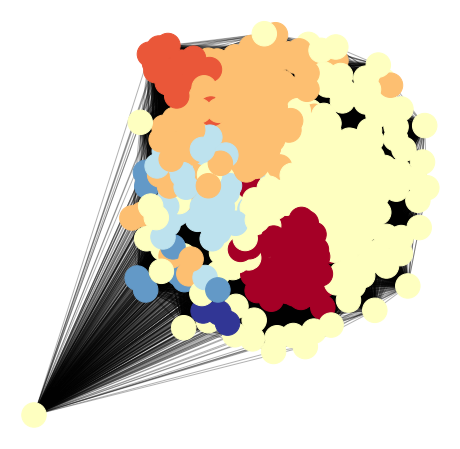

In [14]:
#plot of abstraction graph
import community
partitiona = community.best_partition(Gabs)
posa = nx.spring_layout(Gabs)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(Gabs, posa, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partitiona.values()))
nx.draw_networkx_edges(Gabs, posa, alpha=0.3)
plt.show(Gabs)

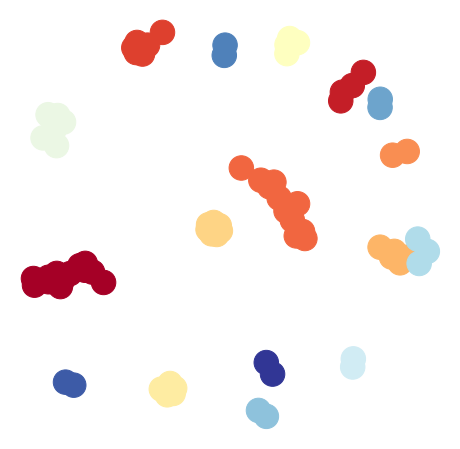

In [37]:
#plot of expression graph
import community
partitionb = community.best_partition(Gexp)
posb = nx.spring_layout(Gexp)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(Gexp, posb, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partitionb.values()))
nx.draw_networkx_edges(Gexp, posb, alpha=0.3)
plt.show(Gexp)

In [38]:
from collections import Counter
count_abs = Counter(partitiona.values())
count_exp = Counter(partitionb.values())
print("clusters in abstraction graph: ", count_abs)
print("clusters in expression graph: ", count_exp)

clusters in abstraction graph:  Counter({3: 226, 2: 134, 0: 67, 4: 40, 1: 19, 5: 11, 6: 3})
clusters in expression graph:  Counter({0: 15, 3: 13, 6: 8, 2: 7, 9: 7, 7: 6, 5: 5, 1: 4, 8: 4, 11: 3, 4: 2, 10: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2})


In [17]:
m_abs = max(count_abs, key=count_abs.get)
m_exp = max(count_exp, key=count_exp.get)
v_abs = count_abs[m_abs]
v_exp = count_exp[m_exp]

In [24]:
abs_score = float(v_abs/vt_abs)
abs_score

0.452

In [25]:
exp_score = float(v_exp/vt_exp)
exp_score

0.1744186046511628

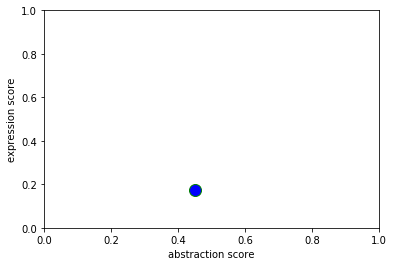

In [28]:
import matplotlib.pyplot as plt

plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel('abstraction score') 
# naming the y axis 
plt.ylabel('expression score') 
plt.plot(abs_score, exp_score, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
plt.show()